In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pyximport

pyximport.install(setup_args={'include_dirs': np.get_include()},reload_support=True)
from InertialLangevin3D_cython import InertialLangevin3D
from mpl_toolkits import mplot3d
from scipy.signal import correlate

import matplotlib.gridspec as gridspec

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 140

mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 0.2
mpl.rcParams["figure.dpi"] = 130
from matplotlib import rc
rc('font', family='serif')
#rc('text', usetex=True)
rc('xtick', labelsize='x-small')
rc('ytick', labelsize='x-small')

# Langevin 3D, bulk, free particule

## With inertia

<font color='blue'> Trajectory of a brownian particul with inertia is given by :

\begin{equation}
m \ddot{x} = - \gamma \dot{x} + \sqrt{2 k_b T \gamma} ~ dB_{t} 
\end{equation}

To compute it numericaly we can use finite difference given by :

\begin{equation}
m \frac{ x_i - 2x_{i-1} + x_{i-2} }{ \Delta t^{2} } x_{i-1} = - \gamma \frac{ x_i - x_{i-1} }{ \Delta t } + \sqrt{2 k_b T \gamma} ~~~ dB_t
\end{equation}

that give :

\begin{equation}
x_i = \frac{ 2 + \Delta t \frac{\gamma}{m} }{ 1 + \Delta t \frac{\gamma}{m} } x_{i-1} - \frac{ 1 }{ 1 + \Delta t \frac{\gamma}{m} } x_{i-2} + \frac{ \sqrt{2 k_b T \gamma} }{ m ( 1 + \Delta t \frac{\gamma}{m} ) } ~~ \Delta t^{2} dB_t
\end{equation}




$\underline{Creation~of~\textit{InertialLangevin3D}~class.}$

It heritate of $\textit{Langevin3D}$ (with its attributes and methodes),

$\textbf{Attribute add}$:

- rho : volumique masse of the particule, 

then we can calculate :

- m = rho * (4/3) * np.pi * R**3
- tau = m / gamma

$\textbf{Methode rewritten}$:

- trajectory(dt, Nt, R, rho, output=False)</font>




### 1 Trajectories with inertia

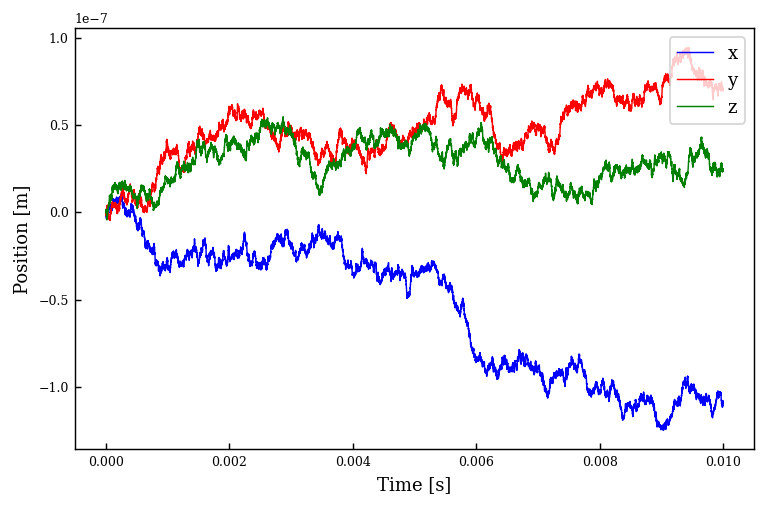

In [2]:
dt = 1e-9
Nt = 10000000
R = 1e-6
rho = 1050

inertial_langevin3D = InertialLangevin3D(dt, Nt, R, rho, x0 = (0,0,0))
inertial_langevin3D.trajectory()
inertial_langevin3D.plotTrajectory()


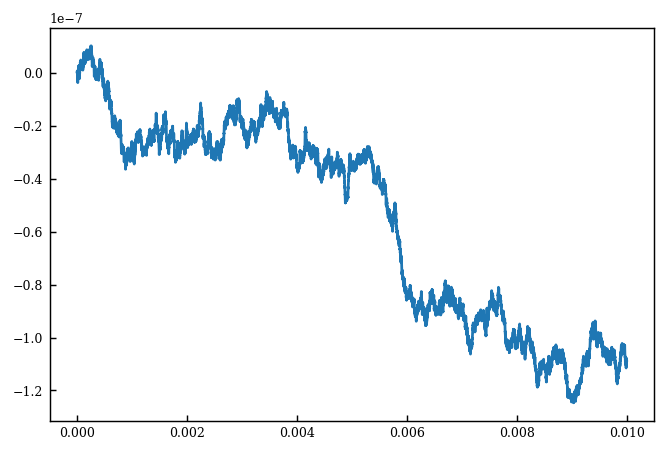

In [3]:
plt.plot(inertial_langevin3D.t ,inertial_langevin3D.x)

### II.2 Mean square displacement 1D

In [4]:
MSDx = inertial_langevin3D.MSD1D("x", output=True)
MSDy = inertial_langevin3D.MSD1D("y", output=True)
MSDz = inertial_langevin3D.MSD1D("z", output=True)

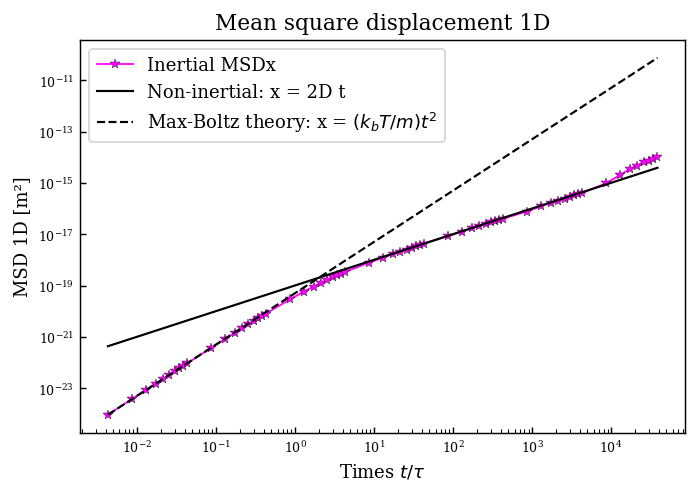

In [5]:
plt.loglog(inertial_langevin3D.t[inertial_langevin3D.list_dt_MSD] / inertial_langevin3D.tau,
            MSDx,
            "*-",
            color="magenta",
            linewidth=1.0,
            label="Inertial MSDx",
            )
plt.plot(inertial_langevin3D.t[inertial_langevin3D.list_dt_MSD] / inertial_langevin3D.tau,
         (2 * inertial_langevin3D.kb * inertial_langevin3D.T / inertial_langevin3D.gamma) * inertial_langevin3D.t[inertial_langevin3D.list_dt_MSD],
         linewidth=1.2,
         color="black",
         label="Non-inertial: x = 2D t",
        )
plt.plot(inertial_langevin3D.t[inertial_langevin3D.list_dt_MSD] / inertial_langevin3D.tau,
         (inertial_langevin3D.kb * inertial_langevin3D.T / (inertial_langevin3D.m)) * inertial_langevin3D.t[inertial_langevin3D.list_dt_MSD]**2,
         linewidth=1.2,
         linestyle="--",
         color="black",
         label="Max-Boltz theory: x = $(k_b T / m) t^2$",
        )
plt.xlabel("Times $ t/ \\tau $")
plt.ylabel("MSD 1D [m²]")
plt.title("Mean square displacement 1D")
plt.legend()
plt.show()

<font color='blue'> We can see that the MSD is similar than the non-inertial theory after $t = \tau$.

Before $t = \tau$, inertial effect decrease the MSD below $x = 2Dt$,

where,
\begin{equation}
D =  \frac{k_b T}{\gamma} = \frac{k_b T}{6 \pi \eta R}
\end{equation}
    
because of ballistic regime we have $MSD_{1D} = \frac{k_b T}{m}~t^2 $ 
</font>





### II.3 Mean square displacement 3D

In [6]:
MSD3D = inertial_langevin3D.MSD3D(output=True)

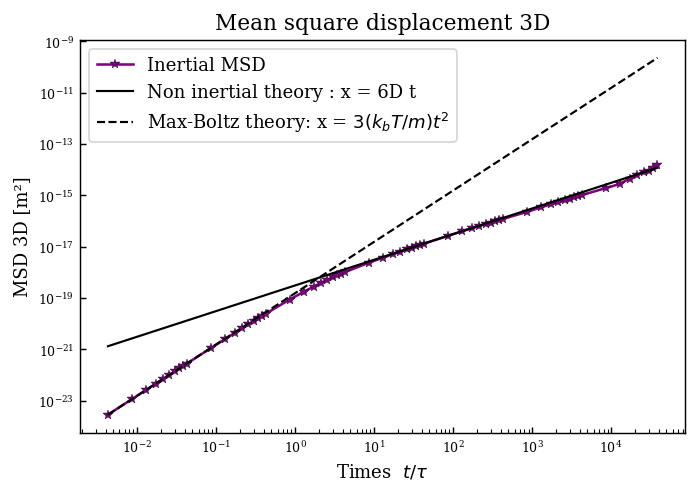

In [7]:
plt.loglog(
        inertial_langevin3D.t[inertial_langevin3D.list_dt_MSD] / inertial_langevin3D.tau,
        MSD3D,
        "*-",
        color="purple",
        linewidth=1.4,
        label="Inertial MSD",
    )
plt.plot(
        inertial_langevin3D.t[inertial_langevin3D.list_dt_MSD] / inertial_langevin3D.tau,
        (6 * inertial_langevin3D.kb * inertial_langevin3D.T / inertial_langevin3D.gamma) * inertial_langevin3D.t[inertial_langevin3D.list_dt_MSD],
        color="black",
        linewidth=1.2,
        label="Non inertial theory : x = 6D t",
    )
plt.plot(inertial_langevin3D.t[inertial_langevin3D.list_dt_MSD] / inertial_langevin3D.tau,
         (3*inertial_langevin3D.kb * inertial_langevin3D.T / (inertial_langevin3D.m)) * inertial_langevin3D.t[inertial_langevin3D.list_dt_MSD]**2,
         linewidth=1.2,
         linestyle="--",
         color="black",
         label="Max-Boltz theory: x = $3(k_b T / m) t^2$",
        )
plt.xlabel("Times  $ t/ \\tau $")
plt.ylabel("MSD 3D [m²]")
plt.title("Mean square displacement 3D")
plt.legend()
plt.show()

<font color='blue'>We can see the same result in 3D. Before $t = \tau$, we have Maxwell-Boltzmann theory and after $t = \tau$, inertial MSD is the same than theory in non-inertial. </font>

### II.4. Speed distribution at short time

<font color='blue'>
At short times, inertial effect are predominant. We don't need to normalise because the speed doesn't depends of the time $\Delta t$. We have the same Maxwell-Boltzmann law for all $\Delta t < \tau$. This theoritical distribution (normalised) is:
    
\begin{equation}
p(v) = \sqrt{ \frac{m}{2 \pi k_b T} } ~ exp \left( - \frac{m}{k_b T} \frac{v^2}{2} \right) 
\end{equation}
</font>

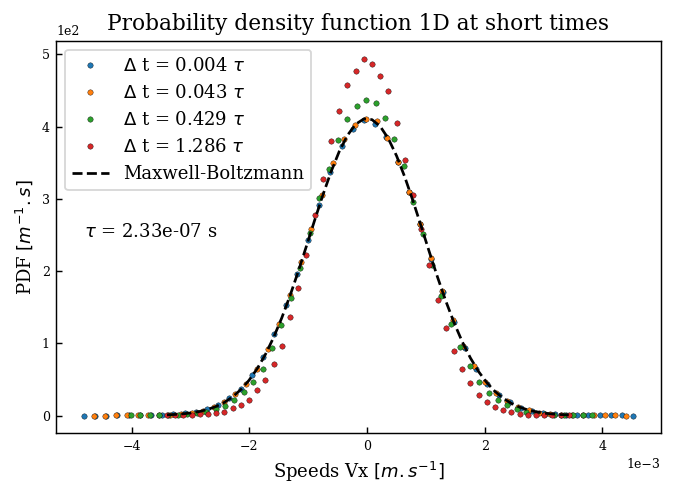

In [8]:
axis = "x"
nbTimesIntervalle = [1, 10, 100, 300]

m = inertial_langevin3D.m
kb = inertial_langevin3D.kb
T = inertial_langevin3D.T

for i in nbTimesIntervalle:
    hist, binsPosition = inertial_langevin3D.speedDistribution1D(axis, i, output=True)
    plt.plot(binsPosition,hist, ".", label="$\Delta$ t = {:.3f} $\\tau$".format(i*inertial_langevin3D.dt/inertial_langevin3D.tau))
    
    if i == nbTimesIntervalle[-1]:
        y_text =  np.max(hist)/2
    if i == nbTimesIntervalle[0]:
        x_text = np.min(binsPosition)

y_Max_boltzman = (m/(2*np.pi*kb*T))**(1/2) * np.exp(-(m*binsPosition**2)/(2*kb*T)) # Short time
      
plt.plot(binsPosition, y_Max_boltzman, "--", color="black", label="Maxwell-Boltzmann")
plt.text(x_text, y_text, "$\\tau$ = {:.2e} s".format(inertial_langevin3D.tau))
plt.title("Probability density function 1D at short times")
plt.xlabel("Speeds V" + axis + " $[m.s^{-1}]$")
plt.ylabel("PDF $[m^{-1}.s]$")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
plt.legend( loc = 'upper left', markerscale = 1)
# plt.axis([None, 3e-3, None, None])
plt.show()

(-2.0, 2.0, 1e-07, 16.009711796112867)

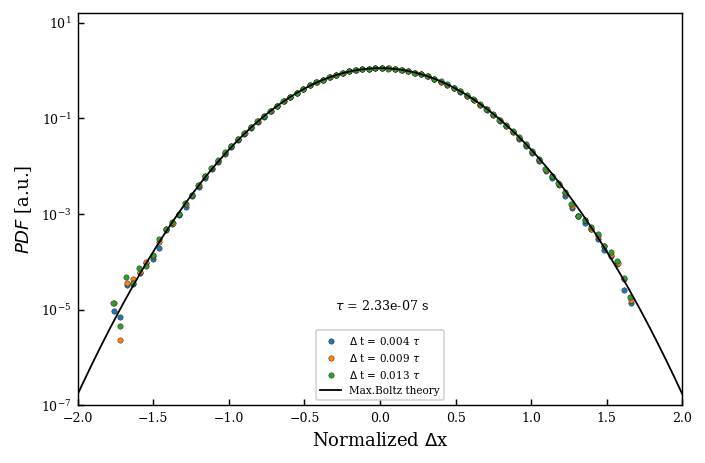

In [9]:
axis = "x"
nbTimesIntervalle = [1, 2, 3]

m = inertial_langevin3D.m
kb = inertial_langevin3D.kb
T = inertial_langevin3D.T


for i in nbTimesIntervalle:
    hist, binsPosition = inertial_langevin3D.dXDistribution1D(axis, i, output=True, bins=80)
    
    std = np.std(binsPosition)
    dx_hist = binsPosition / std
    y_hist = hist / np.trapz(hist,dx_hist)
    
    plt.semilogy(dx_hist, y_hist, ".", label="$\Delta$ t = {:.3f} $\\tau$".format(i*inertial_langevin3D.dt/inertial_langevin3D.tau))

    if i == nbTimesIntervalle[-1]:
        std_theo = np.sqrt(kb*T/m)*i*inertial_langevin3D.dt
        x_Max_B = np.linspace(-3e-11, 3e-11, 1000)
        y_Max_boltzman = 1/(std_theo*np.sqrt(2*np.pi)) * np.exp(-(x_Max_B)**2/(2*std_theo**2)) # Short time
        
        x_Max_B = x_Max_B / std
        y_Max_boltzman = y_Max_boltzman / np.trapz(y_Max_boltzman, x_Max_B)
        
        plt.semilogy(x_Max_B, y_Max_boltzman, "-", color="black", linewidth=1, label="Max.Boltz theory")

plt.text(-0.3, 1e-5, "$\\tau$ = {:.2e} s".format(inertial_langevin3D.tau), fontsize=7)
plt.xlabel("Normalized $\\Delta$" + axis)
plt.ylabel("$PDF$ [a.u.]")
plt.legend(loc='lower center', fontsize='xx-small')
plt.axis([-2, 2, 1e-7, None])

### II.4 dX distribution at long time

<font color='blue'>Like in the first part, when ($t >> \tau$), we have :
    
\begin{equation} 
y_{theo} = \frac{1}{\sqrt{2 \pi}} e^{{- \frac{x_{list}^{2}}{ 2} }}
\end{equation}

where $\Delta x$ is normalised by :

\begin{equation} 
    \Delta x_{hist} = \frac{\Delta x}{\sqrt{2 D \Delta t }}
\end{equation}
 
and where we normalised the integral.
</font>



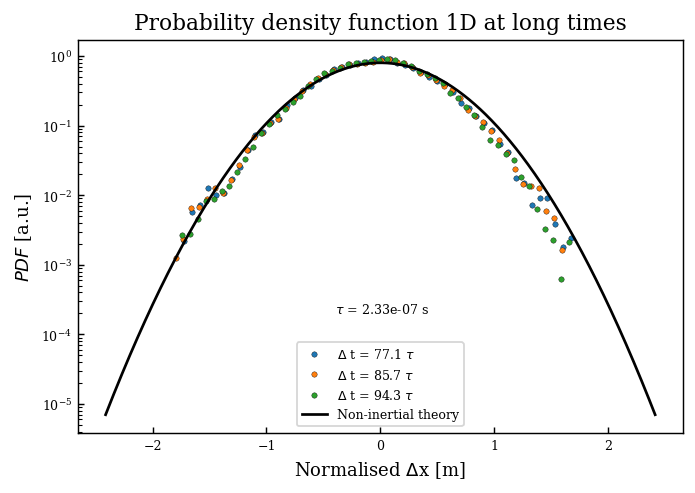

In [10]:
axis = "x"
nbTimesIntervalle = [18000, 20000, 22000]

for i in nbTimesIntervalle:
    hist, binsPosition = inertial_langevin3D.dXDistribution1D(axis, i, bins=50, output=True)
    std = np.std(binsPosition)
    dx_hist = binsPosition / np.std(binsPosition)
    y_hist = hist / np.trapz(hist, dx_hist) ## IL FAUT NORMALISER (car pas hors equilibre)
    
    plt.semilogy(dx_hist, y_hist, ".", label="$\Delta$ t = {:.1f} $\\tau$".format(i*inertial_langevin3D.dt/inertial_langevin3D.tau))

    if i == nbTimesIntervalle[-1]:
        sigma = np.sqrt(2*inertial_langevin3D.D*inertial_langevin3D.dt*i)
        x_theo = np.linspace(-1.5e-8, 1.5e-8, 1000)
        y_theo = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x_theo**2)/(2*sigma**2))
        x_theo = x_theo/sigma/2
        y_theo = y_theo / np.trapz(y_theo, x_theo)

plt.text(-0.4, 2e-4, "$\\tau$ = {:.2e} s".format(inertial_langevin3D.tau), fontsize=7)
plt.plot(x_theo, y_theo, "-", color="black", label="Non-inertial theory")
plt.title("Probability density function 1D at long times")
plt.xlabel("Normalised $\\Delta$" + axis + " [m]")
plt.ylabel("$PDF$ [a.u.]")
plt.legend(loc='lower center', fontsize='x-small')
# plt.axis([-1.3e-8, 1.3e-8, 1e4, None])
plt.show()

In [11]:
sigma, std

(3.1086794856562307e-09, 6.752759622180265e-09)

<font color='blue'> We can see that when $t > \tau$ but close to $\tau$, the non inertial theory does'nt work again (blue and orange curves). But at long times ($t >> \tau$), the PDF (green and red) fit with the non-inertial theory.
    
    
To conclude, at short times ($t << \tau$) we have Maxwell-boltzmann law because of the inertial effect and at long times ($t >> \tau$), inertial effect disappears and non-inertial law fit.
</font>

### II.5 Autocorelation at short times

<font color='blue'> 
We can compute the speed autocorelation at short time:
</font>

In [12]:
inertial_langevin3D.speedDistribution1D(axis="x")
speed = inertial_langevin3D.speed
x_cor = speed - np.mean(speed)
autoco = correlate(x_cor, x_cor, mode='same')

t_cor = inertial_langevin3D.t[:-1]-np.mean(inertial_langevin3D.t[:-1])

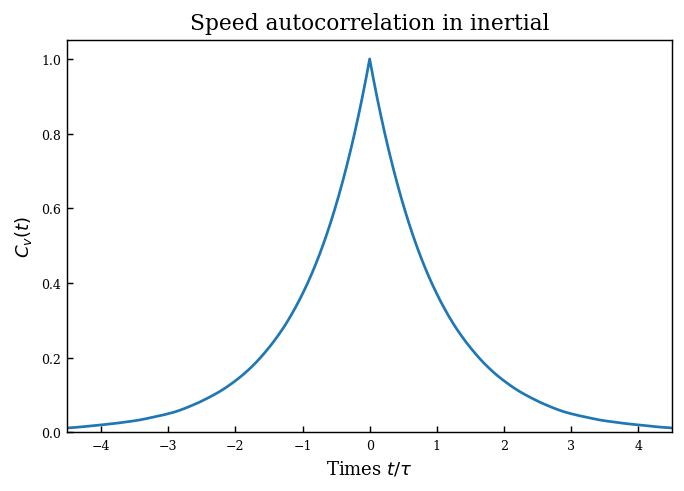

In [13]:
plt.plot(t_cor/inertial_langevin3D.tau, autoco/np.max(autoco))
plt.title("Speed autocorrelation in inertial")
plt.xlabel("Times $t / \\tau$")
plt.ylabel("$C_{v}(t)$")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
plt.axis([-4.5, 4.5, 0, None])
plt.show()

<font color='blue'> We can see that at $t=0$, speed is correlated. Then the correlation decrease until $t = 3.5 \tau$ and after that, when $t >> \tau$, speed is anti-correlated. That show the inertial effects at short time $t <= \tau$. The particules have memories for the begining of the trajectory and after that back to brownian motion after $t = 3.5 \tau$.
</font>

## Plot joli pour rapport

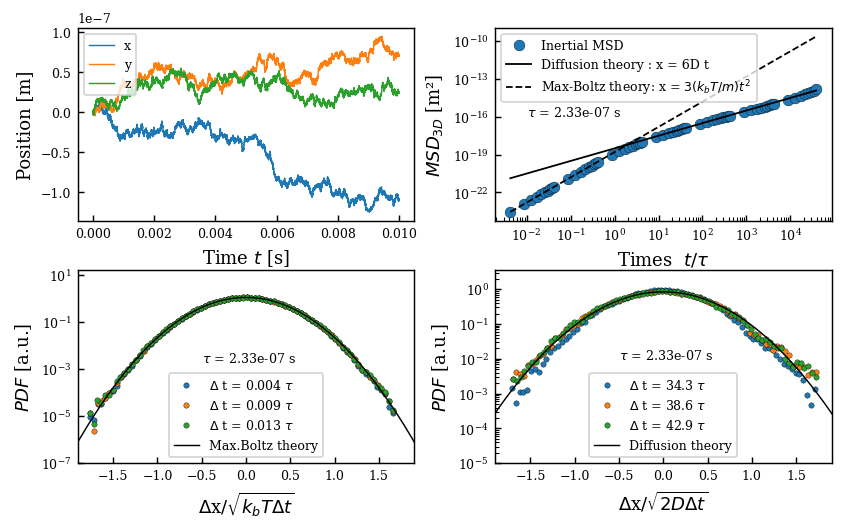

In [15]:
def cm2Inch(cm):
    inch = cm / 2.54
    return inch

w = cm2Inch(21 - 5)
h = cm2Inch((21 - 5)/1.618)
fig = plt.figure(constrained_layout=False, figsize=(w,h))
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

###################################################
fig.add_subplot(spec[0, 0])

plt.plot(inertial_langevin3D.t, inertial_langevin3D.x, linewidth=0.8, label="x")
plt.plot(inertial_langevin3D.t, inertial_langevin3D.y, linewidth=0.8, label="y")
plt.plot(inertial_langevin3D.t, inertial_langevin3D.z, linewidth=0.8, label="z")
plt.xlabel("Time $t$ [s]")
plt.ylabel("Position [m]")
plt.ticklabel_format(axis="y", style="sci", scilimits=(-2, 2))
plt.legend(loc="upper left", fontsize="x-small")

###################################################
fig.add_subplot(spec[0, 1])

plt.loglog(
        inertial_langevin3D.t[inertial_langevin3D.list_dt_MSD] / inertial_langevin3D.tau,
        MSD3D,
        "o",
#         color="purple",
        linewidth=1.4,
        label="Inertial MSD",
    )
plt.plot(
        inertial_langevin3D.t[inertial_langevin3D.list_dt_MSD] / inertial_langevin3D.tau,
        (6 * inertial_langevin3D.kb * inertial_langevin3D.T / inertial_langevin3D.gamma) * inertial_langevin3D.t[inertial_langevin3D.list_dt_MSD],
        color="black",
        linewidth=1,
        label="Diffusion theory : x = 6D t",
    )
plt.plot(inertial_langevin3D.t[inertial_langevin3D.list_dt_MSD] / inertial_langevin3D.tau,
         (3*inertial_langevin3D.kb * inertial_langevin3D.T / (inertial_langevin3D.m)) * inertial_langevin3D.t[inertial_langevin3D.list_dt_MSD]**2,
         linewidth=1,
         linestyle="--",
         color="black",
         label="Max-Boltz theory: x = $3(k_b T / m) t^2$",
        )
plt.text(1e-2, 1e-16, "$\\tau$ = {:.2e} s".format(inertial_langevin3D.tau), fontsize=7)
plt.xlabel("Times  $ t/ \\tau $")
plt.ylabel("$MSD_{3D}$ [m²]")
plt.legend(loc="upper left", fontsize="x-small")

###################################################
fig.add_subplot(spec[1, 0])

axis = "x"
nbTimesIntervalle = [1, 2, 3]

m = inertial_langevin3D.m
kb = inertial_langevin3D.kb
T = inertial_langevin3D.T


for i in nbTimesIntervalle:
    hist, binsPosition = inertial_langevin3D.dXDistribution1D(axis, i, output=True, bins=80)
    
    std = np.std(binsPosition)
    dx_hist = binsPosition / std
    y_hist = hist / np.trapz(hist,dx_hist)
    
    plt.semilogy(dx_hist, y_hist, ".", label="$\Delta$ t = {:.3f} $\\tau$".format(i*inertial_langevin3D.dt/inertial_langevin3D.tau))

    if i == nbTimesIntervalle[-1]:
        std_theo = np.sqrt(kb*T/m)*i*inertial_langevin3D.dt
        x_Max_B = np.linspace(-3e-11, 3e-11, 1000)
        y_Max_boltzman = 1/(std_theo*np.sqrt(2*np.pi)) * np.exp(-(x_Max_B)**2/(2*std_theo**2)) # Short time
        
        x_Max_B = x_Max_B / std
        y_Max_boltzman = y_Max_boltzman / np.trapz(y_Max_boltzman, x_Max_B)
        
        plt.semilogy(x_Max_B, y_Max_boltzman, "-", color="black", linewidth=0.8, label="Max.Boltz theory")

plt.text(-0.5, 2e-3, "$\\tau$ = {:.2e} s".format(inertial_langevin3D.tau), fontsize=7)
plt.xlabel("$\\Delta$" + axis +"$/ \\sqrt{k_b T \\Delta t}$")
plt.ylabel("$PDF$ [a.u.]")
plt.legend(loc='lower center', fontsize='x-small')
plt.axis([-1.9, 1.9, 1e-7, None])


###################################################
fig.add_subplot(spec[1, 1])

axis = "x"
nbTimesIntervalle = [8000, 9000, 10000]

for i in nbTimesIntervalle:
    hist, binsPosition = inertial_langevin3D.dXDistribution1D(axis, i, bins=80, output=True)
    std = np.std(binsPosition)
    dx_hist = binsPosition / np.std(binsPosition)
    y_hist = hist / np.trapz(hist, dx_hist) ## IL FAUT NORMALISER (car pas hors equilibre)
    
    plt.semilogy(dx_hist, y_hist, ".", label="$\Delta$ t = {:.1f} $\\tau$".format(i*inertial_langevin3D.dt/inertial_langevin3D.tau))

    if i == nbTimesIntervalle[-1]:
        sigma = np.sqrt(2*inertial_langevin3D.D*inertial_langevin3D.dt*i)
        x_theo = np.linspace(-1.5e-8, 1.5e-8, 1000)
        y_theo = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x_theo**2)/(2*sigma**2))
        x_theo = x_theo/std
        y_theo = y_theo / np.trapz(y_theo, x_theo)

plt.text(-0.5, 1e-2, "$\\tau$ = {:.2e} s".format(inertial_langevin3D.tau), fontsize=7)
plt.plot(x_theo, y_theo, "-", color="black", linewidth=0.8, label="Diffusion theory")
plt.xlabel("$\\Delta$" + axis +"$/ \\sqrt{2D \\Delta t} $")
plt.ylabel("$PDF$ [a.u.]")
plt.legend(loc='lower center', fontsize='x-small')
plt.axis([-1.9, 1.9, 1e-5, None])

plt.tight_layout(pad = 0.01,h_pad=0.0001, w_pad=0.3)
plt.savefig("InertialBulk.svg")